In [2]:
import tensorflow as tf
from utils.architectures import residual_attention_56
from utils.plot import getAccuracyPlot, getLossPlot

In [3]:
cifar10 = tf.keras.datasets.cifar10 #load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 10) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 10) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 10

In [3]:
model = residual_attention_56(input_shape=input_shape, output_size=output_size) 

In [4]:
model.compile(tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 16, 16, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [7]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=200)

Epoch 1/200
625/625 [==============================] - 108s 167ms/step - loss: 1.7893 - accuracy: 0.3303 - val_loss: 2.4783 - val_accuracy: 0.2950
Epoch 2/200
625/625 [==============================] - 121s 194ms/step - loss: 1.5849 - accuracy: 0.4082 - val_loss: 3.8667 - val_accuracy: 0.2021
Epoch 3/200
625/625 [==============================] - 141s 226ms/step - loss: 1.4881 - accuracy: 0.4480 - val_loss: 1.8614 - val_accuracy: 0.3697
Epoch 4/200
625/625 [==============================] - 166s 266ms/step - loss: 1.4282 - accuracy: 0.4739 - val_loss: 2.1876 - val_accuracy: 0.3378
Epoch 5/200
625/625 [==============================] - 152s 244ms/step - loss: 1.3616 - accuracy: 0.5007 - val_loss: 1.8678 - val_accuracy: 0.3760
Epoch 6/200
625/625 [==============================] - 148s 236ms/step - loss: 1.3215 - accuracy: 0.5212 - val_loss: 1.7863 - val_accuracy: 0.3833
Epoch 7/200
625/625 [==============================] - 180s 287ms/step - loss: 1.2784 - accuracy: 0.5379 - val_loss: 1

625/625 [==============================] - 177s 283ms/step - loss: 0.6823 - accuracy: 0.7619 - val_loss: 0.9394 - val_accuracy: 0.6856
Epoch 112/200
625/625 [==============================] - 175s 279ms/step - loss: 0.6750 - accuracy: 0.7664 - val_loss: 0.9024 - val_accuracy: 0.6972
Epoch 113/200
625/625 [==============================] - 179s 286ms/step - loss: 0.6675 - accuracy: 0.7681 - val_loss: 0.8396 - val_accuracy: 0.7217
Epoch 114/200
625/625 [==============================] - 177s 283ms/step - loss: 0.6611 - accuracy: 0.7719 - val_loss: 0.7880 - val_accuracy: 0.7305
Epoch 115/200
625/625 [==============================] - 177s 282ms/step - loss: 0.6709 - accuracy: 0.7669 - val_loss: 0.8509 - val_accuracy: 0.7128
Epoch 116/200
625/625 [==============================] - 178s 284ms/step - loss: 0.6656 - accuracy: 0.7710 - val_loss: 0.7808 - val_accuracy: 0.7287
Epoch 117/200
625/625 [==============================] - 174s 279ms/step - loss: 0.6626 - accuracy: 0.7701 - val_loss: 0

625/625 [==============================] - 173s 277ms/step - loss: 0.5506 - accuracy: 0.8117 - val_loss: 0.7556 - val_accuracy: 0.7464
Epoch 167/200
625/625 [==============================] - 172s 275ms/step - loss: 0.5536 - accuracy: 0.8101 - val_loss: 0.7573 - val_accuracy: 0.7428
Epoch 168/200
625/625 [==============================] - 171s 273ms/step - loss: 0.5523 - accuracy: 0.8091 - val_loss: 0.7256 - val_accuracy: 0.7523
Epoch 169/200
625/625 [==============================] - 171s 274ms/step - loss: 0.5484 - accuracy: 0.8088 - val_loss: 0.6858 - val_accuracy: 0.7603
Epoch 170/200
625/625 [==============================] - 169s 270ms/step - loss: 0.5488 - accuracy: 0.8098 - val_loss: 0.8163 - val_accuracy: 0.7302
Epoch 171/200
625/625 [==============================] - 173s 276ms/step - loss: 0.5451 - accuracy: 0.8103 - val_loss: 0.6629 - val_accuracy: 0.7776
Epoch 172/200
625/625 [==============================] - 170s 272ms/step - loss: 0.5431 - accuracy: 0.8129 - val_loss: 0

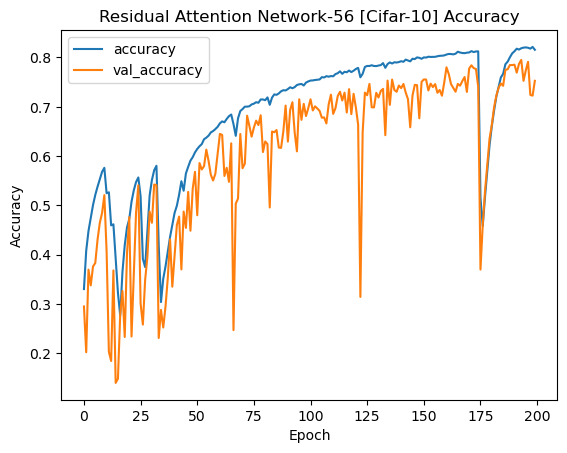

In [8]:
getAccuracyPlot(history, 'Residual Attention Network-56 [Cifar-10]')

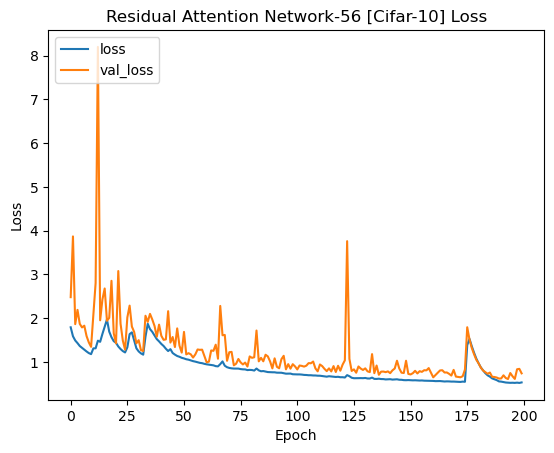

In [9]:
getLossPlot(history, 'Residual Attention Network-56 [Cifar-10]')

In [10]:
model.save('cifar10_att56_epoch200.h5')

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [4]:
from tensorflow.keras.models import load_model
model = load_model('cifar10_att56_epoch200.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 15s 44ms/step - loss: 0.6893 - accuracy: 0.7767


[0.6893270611763, 0.7767000198364258]